In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [0]:
import os 
os.chdir("/content/drive/My Drive/Image_Resolution/")
os.getcwd()
!ls

butterfly.png	inputTes_rgb.png  __pycache__		    test.h5
crop_train.h5	out22_rgb.png	  SRCNN_check915.h5	    test_rgb.h5
face.png	outTes_rgb.png	  SRCNN_check_rgb_9-3-5.h5  train_rgb.h5
input2_rgb.png	prepare_data.py   SRCNN_check_rgb_9-5-5.h5
input3_rgb.png	pre_rgb.png	  SRCNN_check_rgb.h5


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint,Callback
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import prepare_data as pd
import numpy 
import math

Using TensorFlow backend.


In [0]:

%matplotlib inline
data_rgb,label_rgb=pd.read_training_data("test_rgb.h5")
print(data.shape,label.shape)
print(data[0][0][0][0])
data_img=data_rgb[5]
label_img=label_rgb[5]
data=data*255
label=label*255
fig,axes=plt.subplots(1,2)
axes[0].imshow(data_img)
axes[1].imshow(label_img)


NameError: ignored

In [0]:
data_Y, label_Y = pd.read_training_data("./test.h5")
print(data_Y.shape,label_Y.shape)

(420, 32, 32, 1) (420, 20, 20, 1)


In [0]:
def psnr(target, ref):
    mse = numpy.mean( (target - ref) ** 2 )
    PIXEL_MAX = 255.0
    if mse == 0:
        return 100
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [0]:
def model915():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=1, nb_col=1, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model915():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=1, nb_col=1, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


def model935():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model935():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


def model955():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(32, 32, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN
def predict_model955():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


class PsnrHistory915(Callback):
    

    def on_train_begin(self, logs={}):
        self.psnrs = []
        
    def on_epoch_end(self, epoch, logs={}):
        
        srcnn_model=predict_model915()
        weights_file="SRCNN_check915.h5"
        srcnn_model.load_weights(weights_file)
        avg_psnr=0.0
        import cv2
        for i in range(0,data_Y.shape[0]):
            img=data_Y[i]
            Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
            Y[0, :, :, :] = img
            pre = srcnn_model.predict(Y, batch_size=1) * 255.
            pre[pre[:] > 255] = 255
            pre[pre[:] < 0] = 0
            img_pre=pre[0,:,:,:]
            avg_psnr=avg_psnr+psnr(label_Y[i]*255, img_pre)

        avg_psnr=(avg_psnr/data_Y.shape[0])
        
        self.psnrs.append((avg_psnr))
class PsnrHistory935(Callback):
    

    def on_train_begin(self, logs={}):
        self.psnrs = []
        
    def on_epoch_end(self, epoch, logs={}):
        
        srcnn_model=predict_model935()
        weights_file="SRCNN_check935.h5"
        srcnn_model.load_weights(weights_file)
        avg_psnr=0.0
        import cv2
        for i in range(0,data_Y.shape[0]):
            img=data_Y[i]
            Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
            Y[0, :, :, :] = img
            pre = srcnn_model.predict(Y, batch_size=1) * 255.
            pre[pre[:] > 255] = 255
            pre[pre[:] < 0] = 0
            img_pre=pre[0,:,:,:]
            avg_psnr=avg_psnr+psnr(label_Y[i]*255, img_pre)

        avg_psnr=(avg_psnr/data_Y.shape[0])
        
        self.psnrs.append((avg_psnr))
class PsnrHistory955(Callback):
    

    def on_train_begin(self, logs={}):
        self.psnrs = []
        
    def on_epoch_end(self, epoch, logs={}):
        
        srcnn_model=predict_model955()
        weights_file="SRCNN_check955.h5"
        srcnn_model.load_weights(weights_file)
        avg_psnr=0.0
        import cv2
        for i in range(0,data_Y.shape[0]):
            img=data_Y[i]
            Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
            Y[0, :, :, :] = img
            pre = srcnn_model.predict(Y, batch_size=1) * 255.
            pre[pre[:] > 255] = 255
            pre[pre[:] < 0] = 0
            img_pre=pre[0,:,:,:]
            avg_psnr=avg_psnr+psnr(label_Y[i]*255, img_pre)

        avg_psnr=(avg_psnr/data_Y.shape[0])
        
        self.psnrs.append((avg_psnr))

        
        # avg_psnr2=0.0
        # for i in range(0,data_rgb.shape[0]):
        #     img = cv2.cvtColor(data_rgb[i], cv2.COLOR_BGR2YCrCb)
        #     Y_img=data_Y[i]
        #     Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
        #     Y[0, :, :, :] = Y_img
        #     pre = srcnn_model.predict(Y, batch_size=1) * 255.
        #     pre[pre[:] > 255] = 255
        #     pre[pre[:] < 0] = 0
        #     img=img[6: -6, 6: -6,:]
        #     img[:,:,0]=pre[0,:,:,0]
        #     img=cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
        #     avg_psnr2=avg_psnr2+psnr(label_rgb[i]*255, img)
        
        # avg_psnr2=(avg_psnr2/data_rgb.shape[0])
        


def train915(history):
    srcnn_model = model915()
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./crop_train.h5")
    val_data, val_label = pd.read_training_data("./test.h5")

    checkpoint = ModelCheckpoint("SRCNN_check915.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint,history]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, nb_epoch=200, verbose=0)
    # srcnn_model.load_weights("m_model_adam.h5")


def train935(history):
    srcnn_model = model935()
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./crop_train.h5")
    val_data, val_label = pd.read_training_data("./test.h5")

    checkpoint = ModelCheckpoint("SRCNN_check935.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint,history]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, nb_epoch=200, verbose=0)
    # srcnn_model.load_weights("m_model_adam.h5")


def train955(history):
    srcnn_model = model955()
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./crop_train.h5")
    val_data, val_label = pd.read_training_data("./test.h5")

    checkpoint = ModelCheckpoint("SRCNN_check955.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint,history]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, nb_epoch=200, verbose=0)
    # srcnn_model.load_weights("m_model_adam.h5")

In [0]:
def predict(architecture):
    if architecture=="915":
      srcnn_model = predict_model915()
    elif architecture=="935":
      srcnn_model=predict_model935()
    else:
      srcnn_model=predict_model955()
    weight_file="SRCNN_check"+architecture+".h5" 
    srcnn_model.load_weights(weight_file)
    IMG_NAME = "butterfly.png"
    INPUT_NAME = "Input to "+architecture+".png"
    OUTPUT_NAME = "Output of "+architecture+".png"

    import cv2
    img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    shape = img.shape
    Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
    Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
    print(img.shape,Y_img.shape)
    img[:, :, 0] = Y_img
    Y_img=img[:,:,0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(INPUT_NAME, img)

    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = Y_img.astype(float) / 255.
    pre = srcnn_model.predict(Y, batch_size=1) * 255.
    print(pre.shape)
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    print(img.shape)
    cv2.imwrite(OUTPUT_NAME, img)

    # psnr calculation:
    im1_rgb = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im1_Y = cv2.cvtColor(im1_rgb, cv2.COLOR_BGR2YCrCb)
    im2_rgb = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im2_Y = cv2.cvtColor(im2_rgb, cv2.COLOR_BGR2YCrCb)
    im3_rgb = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6, :]
    im3_Y = cv2.cvtColor(im3_rgb, cv2.COLOR_BGR2YCrCb)
    print(im3_Y.shape,im1_Y.shape)
    print("bicubic:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im2_Y[:,:,0]),psnr(im1_rgb,im2_rgb)))
    print("SRCNN:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im3_Y[:,:,0]),psnr(im1_rgb,im3_rgb)))

    # srcnn_model = predict_model()
    # srcnn_model.load_weights("SRCNN_check.h5")
    # avg_psnr=0.0
    # for i in range(0,data_Y.shape[0]):
    #     img=data_Y[i]
    #     Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
    #     Y[0, :, :, :] = img
    #     pre = srcnn_model.predict(Y, batch_size=1) * 255.
    #     pre[pre[:] > 255] = 255
    #     pre[pre[:] < 0] = 0
    #     img_pre=pre[0,:,:,:]
    #     avg_psnr=avg_psnr+psnr(label_Y[i]*255, img_pre)

    # avg_psnr=(avg_psnr/data_rgb.shape[0])
    # print(avg_psnr)

In [0]:
history915=PsnrHistory915()


train915(history915)
print(history915.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:194: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_623"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1867 (Conv2D)         (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_1868 (Conv2D)         (None, 24, 24, 64)        8256      
_________________________________________________________________
conv2d_1869 (Conv2D)         (None, 20, 20, 1)         1601      
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00706, saving model to SRCNN_check915.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00706 to 0.00512, saving model to SRCNN_check915.h5

Epoch 00003: val_loss improved from 0.00512 to 0.00341, saving model to SRCNN_check915.h5

Epoch 00004: val_loss improved from 0.00341 to 0.00265, saving model to SRCNN_check915.h5

Epoch 00005: val_loss improved from 0.00265 to 0.00229, saving model to SRCNN_check915.h5

Epoch 00006: val_loss improved from 0.00229 to 0.00205, saving model to SRCNN_check915.h5

Epoch 00007: val_loss improved from 0.00205 to 0.00187, saving model to SRCNN_check915.h5

Epoch 00008: val_loss improved from 0.00187 to 0.00177, saving model to SRCNN_check915.h5

Epoch 00009: val_loss improved from 0.00177 to 0.00169, saving model to SRCNN_check915.h5

Epoch 00010: val_loss improved from 0.00169 to 0.00163, saving model to SRCNN_check915.h5

Epoch 00011: val_loss improved from 0.00163 to 0.00158, saving model to SRCNN_check915.h5

Epoch 00012: val_loss improved from 0.00158 to 0.00155, saving model to SRCNN_check915.h5

In [0]:
history935=PsnrHistory935()


train935(history935)
print(history935.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:209: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_619 (Conv2D)          (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_620 (Conv2D)          (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_621 (Conv2D)          (None, 20, 20, 1)         1601      
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00603, saving model to SRCNN_check935.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00603 to 0.00375, saving model to SRCNN_check935.h5

Epoch 00003: val_loss improved from 0.00375 to 0.00266, saving model to SRCNN_check935.h5

Epoch 00004: val_loss improved from 0.00266 to 0.00219, saving model to SRCNN_check935.h5

Epoch 00005: val_loss improved from 0.00219 to 0.00192, saving model to SRCNN_check935.h5

Epoch 00006: val_loss improved from 0.00192 to 0.00177, saving model to SRCNN_check935.h5

Epoch 00007: val_loss improved from 0.00177 to 0.00167, saving model to SRCNN_check935.h5

Epoch 00008: val_loss improved from 0.00167 to 0.00158, saving model to SRCNN_check935.h5

Epoch 00009: val_loss improved from 0.00158 to 0.00152, saving model to SRCNN_check935.h5

Epoch 00010: val_loss improved from 0.00152 to 0.00147, saving model to SRCNN_check935.h5

Epoch 00011: val_loss improved from 0.00147 to 0.00145, saving model to SRCNN_check935.h5

Epoch 00012: val_loss did not improve from 0.00145

Epoch 00013: val_loss improved from 0

In [0]:
history955=PsnrHistory955()


train955(history955)
print(history955.psnrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(32, 32, 1..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:224: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1231 (Conv2D)         (None, 24, 24, 128)       10496     
_________________________________________________________________
conv2d_1232 (Conv2D)         (None, 24, 24, 64)        204864    
_________________________________________________________________
conv2d_1233 (Conv2D)         (None, 20, 20, 1)         1601      
Total params: 216,961
Trainable params: 216,961
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00454, saving model to SRCNN_check955.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`



Epoch 00002: val_loss improved from 0.00454 to 0.00277, saving model to SRCNN_check955.h5

Epoch 00003: val_loss improved from 0.00277 to 0.00205, saving model to SRCNN_check955.h5

Epoch 00004: val_loss improved from 0.00205 to 0.00184, saving model to SRCNN_check955.h5

Epoch 00005: val_loss improved from 0.00184 to 0.00163, saving model to SRCNN_check955.h5

Epoch 00006: val_loss improved from 0.00163 to 0.00154, saving model to SRCNN_check955.h5

Epoch 00007: val_loss improved from 0.00154 to 0.00148, saving model to SRCNN_check955.h5

Epoch 00008: val_loss improved from 0.00148 to 0.00145, saving model to SRCNN_check955.h5

Epoch 00009: val_loss improved from 0.00145 to 0.00143, saving model to SRCNN_check955.h5

Epoch 00010: val_loss improved from 0.00143 to 0.00141, saving model to SRCNN_check955.h5

Epoch 00011: val_loss improved from 0.00141 to 0.00141, saving model to SRCNN_check955.h5

Epoch 00012: val_loss improved from 0.00141 to 0.00139, saving model to SRCNN_check955.h5

[25.09427695111339, 28.22092566500807, 29.76666444135584, 30.19559485877884, 31.56154906301195, 31.936467267927934, 31.71730220340454, 32.46787679556609, 32.45315982882129, 32.57004926560764, 32.721886091928525, 32.721886091928525, 33.06296682369763, 32.29678812655256, 32.815697161179905, 33.05824269958163, 33.08767447802629, 33.040680787030325, 32.99864837507955, 33.054315847251246, 33.054315847251246, 32.90165169574671, 32.90165169574671, 33.06345923319717, 33.02585227533511, 32.914509545248436, 33.09512743630711, 33.07679881873679, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.07579287330273, 33.09174910643072, 33.02219298386508, 33.138762550522635, 33.31045141744219, 33.31045141744219, 33.2649505770164, 33.2649505770164, 33.020135543376526, 33.020135543376526, 33.020135543376526, 33.04417826459989, 33.04417826459989, 33.24934100558771, 33.24934100558771, 3

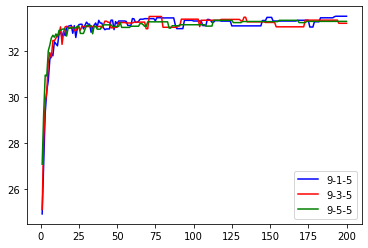

In [0]:
print(history935.psnrs)
x1=numpy.linspace(1,len(history915.psnrs),len(history915.psnrs))
y1 = numpy.asarray(history915.psnrs, dtype=numpy.float32)
x2=numpy.linspace(1,len(history935.psnrs),len(history935.psnrs))
y2 = numpy.asarray(history935.psnrs, dtype=numpy.float32)
x3=numpy.linspace(1,len(history955.psnrs),len(history955.psnrs))
y3 = numpy.asarray(history955.psnrs, dtype=numpy.float32)
fig, ax = plt.subplots()
ax.plot(x1,y1, '-b', label='9-1-5')
ax.plot(x2,y2, '-r', label='9-3-5')
ax.plot(x3,y3,'-g',label='9-5-5')
#ax.axis('equal')
leg = ax.legend();
print(x.shape,y.shape)
plt.show(fig)

In [0]:
predict("915")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(1, 1), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.230292091013126 , RGB=33.19740211220082


In [0]:
predict("935")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.277545037629125 , RGB=33.23858124121794


In [0]:
predict("955")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(5, 5), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`


(256, 256, 3) (256, 256)
(1, 244, 244, 1)
(256, 256, 3)
(244, 244, 3) (244, 244, 3)
bicubic:
YCrCCb= 32.053059313091204 , RGB=32.021477707251755
SRCNN:
YCrCCb= 33.42842130964558 , RGB=33.408090681157795


In [0]:

def predict_model_rgb():
    SRCNN = Sequential()
    SRCNN.add(Conv2D(filters=128, kernel_size=(9,9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 3)))
    SRCNN.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=3, kernel_size=(5,5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN


def model_rgb():
    SRCNN = Sequential()
    SRCNN.add(Conv2D(filters=128, kernel_size=(9,9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(32, 32, 3)))
    SRCNN.add(Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=3, kernel_size=(5,5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN

class PsnrHistory(Callback):
    def on_train_begin(self, logs={}):
        self.psnrs = []
        
    def on_epoch_end(self, epoch, logs={}):
        rmse = math.sqrt(logs['val_loss'])
        psnr2=20 * math.log10(1/rmse)
        srcnn_model = predict_model_rgb()
        srcnn_model.load_weights("SRCNN_check_rgb.h5")
        avg_psnr=0.0
        for i in range(0,data_rgb.shape[0]):
            img=data_rgb[i]
            Y = numpy.zeros((1, img.shape[0], img.shape[1], 3), dtype=float)
            Y[0, :, :, :] = img
            pre = srcnn_model.predict(Y, batch_size=1) * 255.
            pre[pre[:] > 255] = 255
            pre[pre[:] < 0] = 0
            img_pre=pre[0,:,:,:]
            avg_psnr=avg_psnr+psnr(label_rgb[i]*255, img_pre)
        
        avg_psnr=(avg_psnr/data_rgb.shape[0])
        self.psnrs.append(avg_psnr)

def train_rgb(history):
    srcnn_model = model_rgb()
    print(srcnn_model.summary())
    data, label = pd.read_training_data("./train_rgb.h5")
    val_data, val_label = pd.read_training_data("./test_rgb.h5")

    checkpoint = ModelCheckpoint("SRCNN_check_rgb.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
    callbacks_list = [checkpoint,history]

    srcnn_model.fit(data, label, batch_size=128, validation_data=(val_data, val_label),
                    callbacks=callbacks_list, shuffle=True, epochs=20, verbose=0)
    return history
    # srcnn_model.load_weights("m_model_adam.h5")


In [0]:
history=PsnrHistory()
train_rgb(history)
print(history.psnrs)

Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_526 (Conv2D)          (None, 24, 24, 128)       31232     
_________________________________________________________________
conv2d_527 (Conv2D)          (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_528 (Conv2D)          (None, 20, 20, 3)         4803      
Total params: 109,827
Trainable params: 109,827
Non-trainable params: 0
_________________________________________________________________
None

Epoch 00001: val_loss improved from inf to 0.00969, saving model to SRCNN_check_rgb.h5

Epoch 00002: val_loss improved from 0.00969 to 0.00536, saving model to SRCNN_check_rgb.h5

Epoch 00003: val_loss improved from 0.00536 to 0.00402, saving model to SRCNN_check_rgb.h5

Epoch 00004: val_loss improved from 0.00402 to 0.00347, saving model to SRCNN_check_rgb.h5

Epoch 

In [0]:
def predict_rgb():
    srcnn_model = predict_model_rgb()
    srcnn_model.load_weights("SRCNN_check_rgb.h5")
    IMG_NAME = "flower.png"
    INPUT_NAME = "input2_rgb.png"
    OUTPUT_NAME = "pre_rgb.png"

    import cv2
    img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    shape = img.shape
    Y_img = cv2.resize(img[:, :, :], (int(shape[1] / 2), int(shape[0] / 2)), cv2.INTER_CUBIC)
    Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
    img=Y_img
    print(Y_img.shape)
    cv2.imwrite(INPUT_NAME, Y_img)

    Y = numpy.zeros((1, img.shape[0], img.shape[1], 3), dtype=float)
    Y[0, :, :, :] = Y_img.astype(float) / 255.
    pre = srcnn_model.predict(Y, batch_size=1) * 255.
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(numpy.uint8)
    img[6: -6, 6: -6,:]=pre[0,:,:,:]
    print(img.shape)
    cv2.imwrite(OUTPUT_NAME, img)


    # psnr calculation:
    im1_rgb = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6]
    im1_Y = cv2.cvtColor(im1_rgb, cv2.COLOR_BGR2YCrCb)
    im2_rgb = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6]
    im2_Y = cv2.cvtColor(im2_rgb, cv2.COLOR_BGR2YCrCb)
    im3_rgb = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)[6: -6, 6: -6]
    im3_Y = cv2.cvtColor(im3_rgb, cv2.COLOR_BGR2YCrCb)

    print(im1_Y.shape,im2_Y.shape)
    print("bicubic:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im2_Y[:,:,0]),psnr(im1_rgb,im2_rgb)))
    print("SRCNN:")
    print("YCrCCb= {} , RGB={}".format(psnr(im1_Y[:,:,0],im3_Y[:,:,0]),psnr(im1_rgb,im3_rgb)))

1.0 (20,)


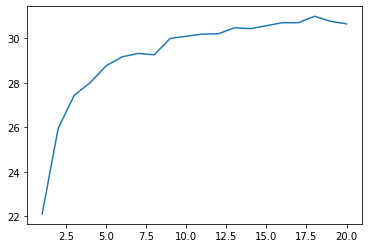

In [0]:
x=numpy.linspace(1,len(history.psnrs),len(history.psnrs))
y = numpy.asarray(history.psnrs, dtype=numpy.float32)
print(x[0],y.shape)
plt.plot(x,history.psnrs)

In [0]:
predict_rgb()



(276, 276, 3)
(276, 276, 3)
(264, 264, 3) (264, 264, 3)
bicubic:
YCrCCb= 33.577765973062625 , RGB=32.56036165104796
SRCNN:
YCrCCb= 33.87933062993204 , RGB=32.57475283303932
